<a href="https://colab.research.google.com/github/dtoralg/INESDI_Data-Science_ML_IA/blob/main/%5B05%5D%20-%20Arboles%20de%20decision/Decision_Tree_(CART).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arboles de decisión: Decision Tree - Ejercicio 0: Decision_Tree_(CART).ipynb

Este notebook es un **I do**: todo resuelto y explicado paso a paso.

## Objetivos

- Explicar visualmente un Arbol de decisión, la base de los modelos de machine learning de arboles de decision

## 1) Instalamos y cargamos librerias DecisionTreeClassifier

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

## 2) Cargamos los datos de la base de datos de Iris

In [2]:
# Cargar datos
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names


## 3) Dividimos train y test

In [3]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

## 4) Definimos y entrenamos el modelo

In [4]:
# Definir y entrenar el modelo
# Hiperparámetros típicos: max_depth, min_samples_split, min_samples_leaf, criterion ("gini" o "entropy")
clf = DecisionTreeClassifier(
    max_depth=3,          # controla complejidad y sobreajuste
    random_state=42,
    criterion="gini"      # "entropy" (ID3) también es común
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## 5) Evaluación del modelo

In [5]:
# Evaluación
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}\n")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.895

Matriz de confusión:
[[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]

Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.80      0.92      0.86        13
   virginica       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38



## 6) Importancia de las variables

In [6]:
# Importancia de variables
importances = clf.feature_importances_
for name, imp in sorted(zip(feature_names, importances), key=lambda x: -x[1]):
    print(f"{name:25s} -> {imp:.3f}")

petal length (cm)         -> 0.951
petal width (cm)          -> 0.049
sepal length (cm)         -> 0.000
sepal width (cm)          -> 0.000


## 7) Representacion del arbol

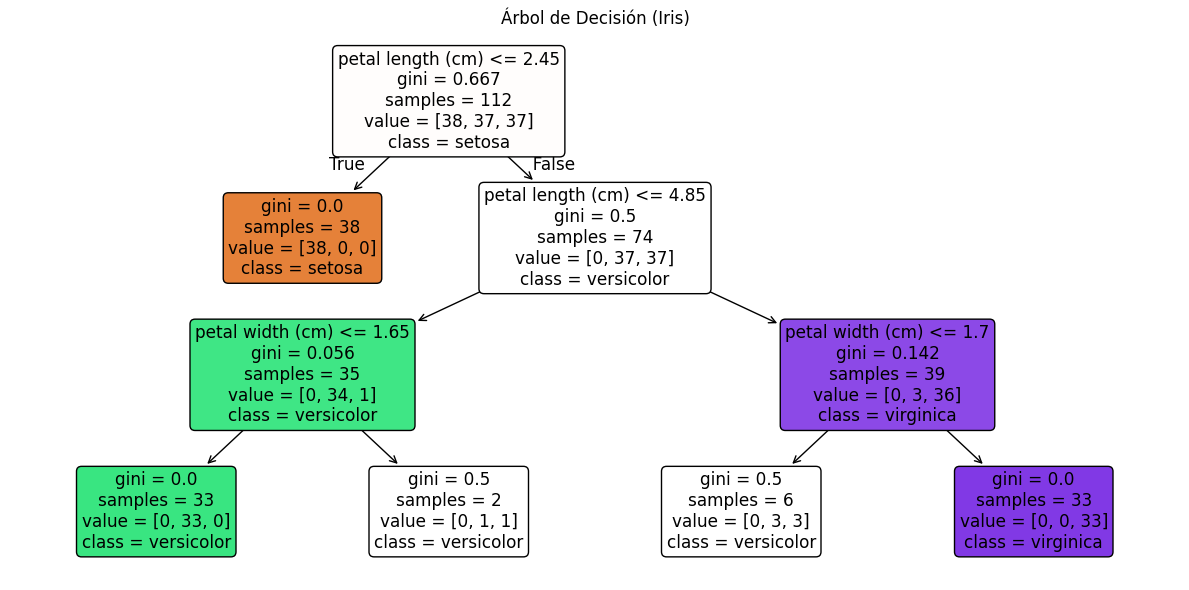

In [7]:
# Visualización del árbol
plt.figure(figsize=(12, 6))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True
)
plt.title("Árbol de Decisión (Iris)")
plt.tight_layout()
plt.show()